<a href="https://colab.research.google.com/github/Justin-143/DataScience/blob/main/COVID_19_Exploratory_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.

--- Initial Data Exploration ---
Shape of the DataFrame: (429435, 67)

Column information and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deat

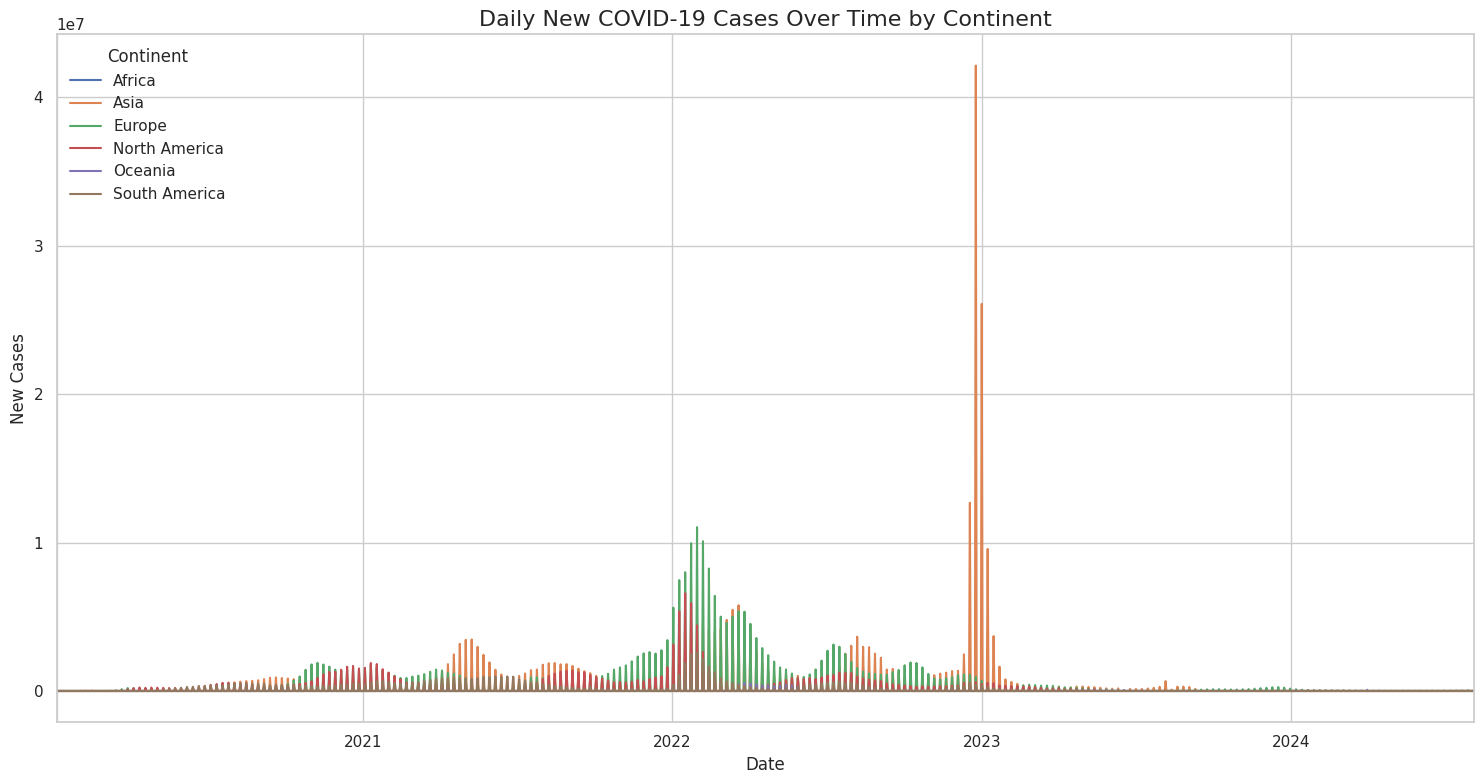

/tmp/ipython-input-2658788627.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_deaths_by_country.values, y=total_deaths_by_country.index, palette='viridis')


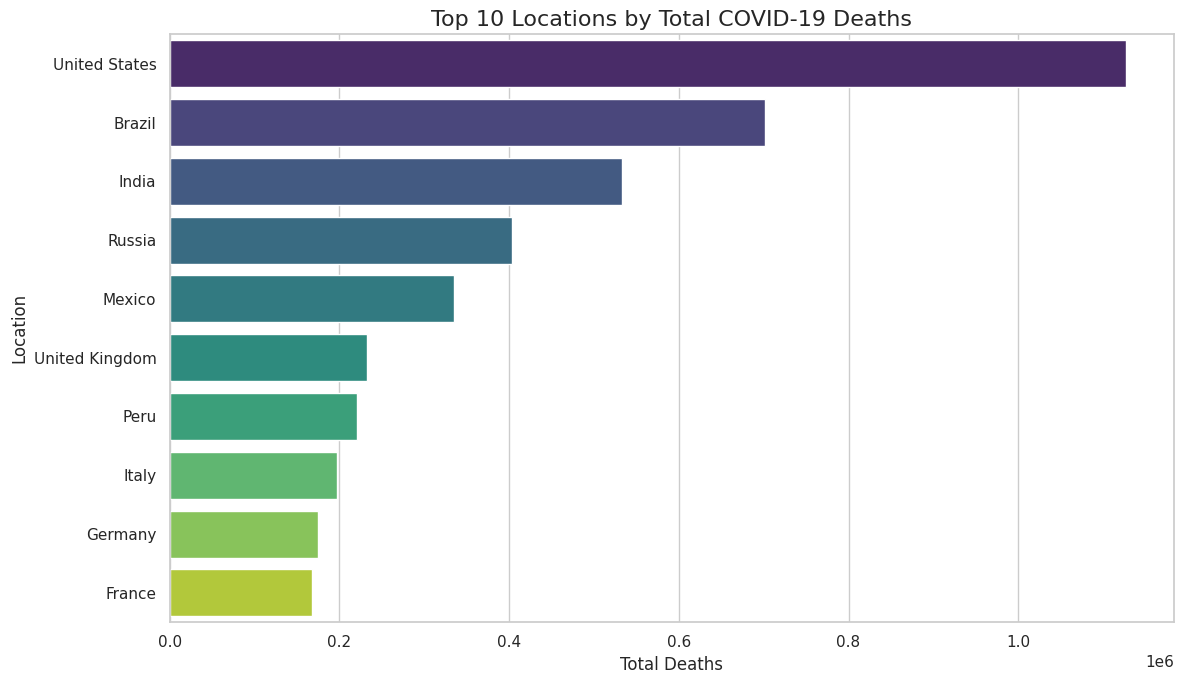

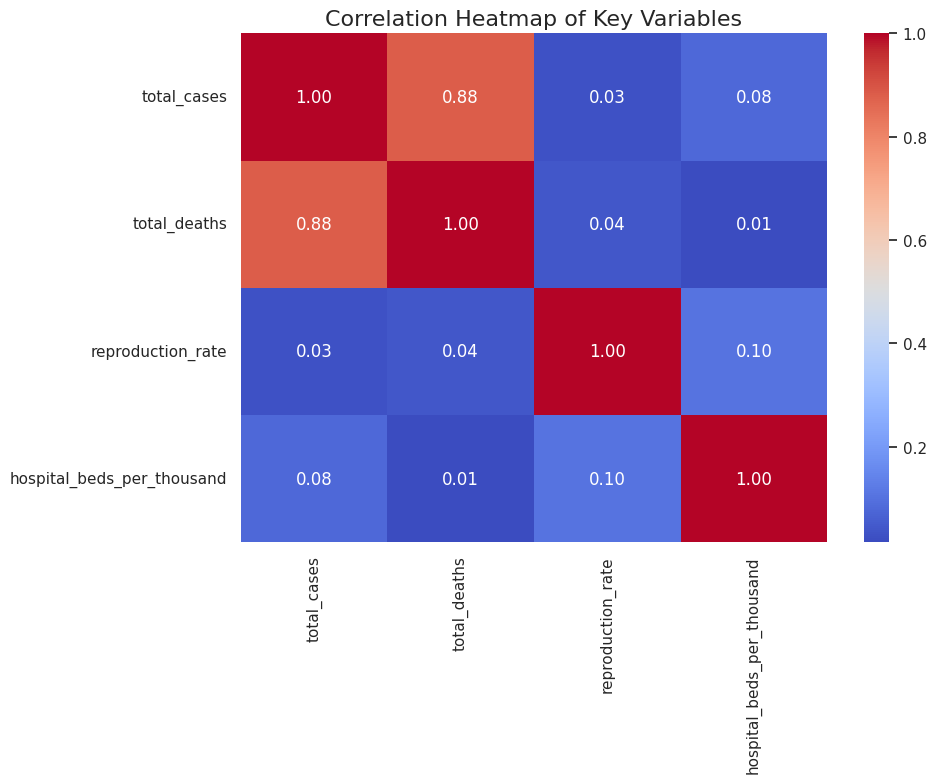


EDA project complete.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# Define the URL for the COVID-19 dataset
DATASET_URL = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

# Load the dataset into a pandas DataFrame
# The low_memory=False argument is used to avoid a DtypeWarning for mixed types in columns.
try:
    df = pd.read_csv(DATASET_URL, low_memory=False)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    # Exit if the data can't be loaded
    exit()

# --- Data Exploration and Cleaning ---
print("\n--- Initial Data Exploration ---")
print(f"Shape of the DataFrame: {df.shape}")
print("\nColumn information and data types:")
df.info()

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Handle missing values in the 'continent' column
# We'll forward fill the continent from previous rows for a given location
df['continent'] = df.groupby('location')['continent'].ffill()

# Drop rows where 'continent' is still missing (these are likely global or non-location entries)
df.dropna(subset=['continent'], inplace=True)

# Drop any rows with missing new_cases or new_deaths to ensure clean numerical plots
df.dropna(subset=['new_cases', 'new_deaths'], inplace=True)


# --- Data Processing and Aggregation ---

# Group by continent and date to get a global trend for new cases
cases_by_continent = df.groupby(['date', 'continent'])['new_cases'].sum().unstack()

# Group by location and get the final total deaths for each location/region
total_deaths_by_country = df.groupby('location')['total_deaths'].max().sort_values(ascending=False).head(10)

# Group by continent to get the final total deaths for each continent
total_deaths_by_continent = df.groupby('continent')['total_deaths'].max().sort_values(ascending=False)

# --- Data Visualization ---

print("\n--- Generating Visualizations ---")

# Plot 1: Daily New Cases over Time by Continent
plt.figure(figsize=(15, 8))
cases_by_continent.plot(ax=plt.gca(), legend=False)
plt.title('Daily New COVID-19 Cases Over Time by Continent', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Cases', fontsize=12)
plt.legend(title='Continent', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot 2: Top 10 Locations by Total Deaths
plt.figure(figsize=(12, 7))
sns.barplot(x=total_deaths_by_country.values, y=total_deaths_by_country.index, palette='viridis')
plt.title('Top 10 Locations by Total COVID-19 Deaths', fontsize=16)
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.show()


# Plot 3: Correlation Heatmap
# Select a subset of numerical columns for the heatmap
numerical_cols = ['total_cases', 'total_deaths', 'reproduction_rate', 'hospital_beds_per_thousand']
# Drop rows with NaN values for these specific columns for accurate correlation calculation
corr_df = df[numerical_cols].dropna()

if not corr_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap of Key Variables', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("\nCould not generate correlation heatmap due to insufficient data after dropping NaNs.")

print("\nEDA project complete.")